In [1]:
import pandas as pd
from geopy import distance
import requests # to call the openmap/google apis
import json
import datetime
import math
import itertools
import numpy as np
import json
import matplotlib.pyplot as plt
import requests 
import networkx as nx
from pulp import *
import seaborn as sn

In [2]:
df = pd.read_csv("Cluster.csv")
df.head()

,Unnamed: 0,Nodes,Latitude,Longitude
0,0,49735507,38.936283,-77.072975
1,1,49748328,38.937335,-77.066387
2,2,49748340,38.938151,-77.066389
3,3,49748353,38.938586,-77.066455
4,4,49753268,38.937332,-77.068636


In [3]:
dataPart1 = df.head(10)

In [4]:
dataPart1

,Unnamed: 0,Nodes,Latitude,Longitude
0,0,49735507,38.936283,-77.072975
1,1,49748328,38.937335,-77.066387
2,2,49748340,38.938151,-77.066389
3,3,49748353,38.938586,-77.066455
4,4,49753268,38.937332,-77.068636
5,5,49753270,38.937332,-77.070886
6,6,49753272,38.937331,-77.072112
7,7,49753274,38.937330,-77.072418
8,8,49753280,38.937287,-77.073793
9,9,49756456,38.938602,-77.065426


In [5]:
df = dataPart1

In [6]:
selected_columns = df[["Latitude","Longitude"]]

df0 = selected_columns.copy()
df0

,Latitude,Longitude
0,38.936283,-77.072975
1,38.937335,-77.066387
2,38.938151,-77.066389
3,38.938586,-77.066455
4,38.937332,-77.068636
5,38.937332,-77.070886
6,38.937331,-77.072112
7,38.937330,-77.072418
8,38.937287,-77.073793
9,38.938602,-77.065426


In [7]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform 
subset = df0[['Latitude', 'Longitude']]
tuples = [tuple(x) for x in subset.to_numpy()]
# print(tuples)
coordinates_array = np.array(tuples)
dist_array = pdist(coordinates_array)

dist_matrix = squareform(dist_array)

type(dist_matrix)

numpy.ndarray

In [8]:
distances = pd.DataFrame(dist_matrix, columns = ['0','1','2','3','4','5','6','7','8','9'])

In [9]:
distances.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.006671,0.006846,0.006915,0.004464,0.002338,0.001358,0.001186,0.001295,0.007897
1,0.006671,0.000000,0.000816,0.001253,0.002249,0.004499,0.005725,0.006031,0.007406,0.001590
2,0.006846,0.000816,0.000000,0.000440,0.002392,0.004571,0.005781,0.006085,0.007454,0.001063
3,0.006915,0.001253,0.000440,0.000000,0.002516,0.004605,0.005795,0.006094,0.007452,0.001029
4,0.004464,0.002249,0.002392,0.002516,0.000000,0.002250,0.003476,0.003782,0.005157,0.003452


In [10]:
df0['Coords'] = list(zip(df0['Latitude'],df0['Longitude']))
df0['ID'] = df0.index

df0

,Latitude,Longitude,Coords,ID
0,38.936283,-77.072975,"(38.936283, -77.072975)",0
1,38.937335,-77.066387,"(38.937335, -77.066387)",1
2,38.938151,-77.066389,"(38.938151, -77.066389)",2
3,38.938586,-77.066455,"(38.938586, -77.066455)",3
4,38.937332,-77.068636,"(38.937332, -77.068636)",4
5,38.937332,-77.070886,"(38.937332, -77.070886)",5
6,38.937331,-77.072112,"(38.937331, -77.072112)",6
7,38.937330,-77.072418,"(38.93733, -77.072418)",7
8,38.937287,-77.073793,"(38.937287, -77.073793)",8
9,38.938602,-77.065426,"(38.938602, -77.065426)",9


In [11]:
location = dict( ( ID, (df0.loc[ID, 'Latitude'], df0.loc[ID, 'Longitude']) ) for ID in df0.index)
location

{0: (38.936283, -77.072975),
 1: (38.937335, -77.066387),
 2: (38.938151, -77.066389),
 3: (38.938586, -77.066455),
 4: (38.937332, -77.068636),
 5: (38.937332, -77.070886),
 6: (38.937331, -77.072112),
 7: (38.93733, -77.072418),
 8: (38.937287, -77.073793),
 9: (38.938602, -77.065426)}

(38.93616705, 38.938717950000004, -77.07421135, -77.06500765)

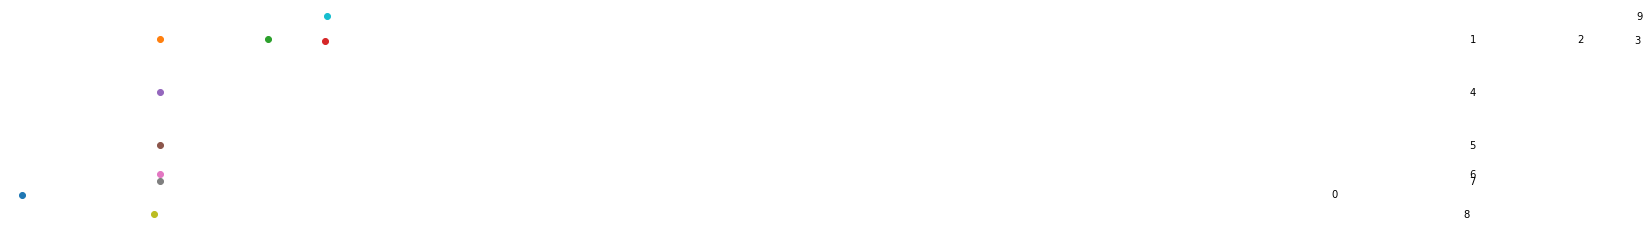

In [12]:
import matplotlib.pyplot as plt
for i in location:
    lo = location[i]
    plt.plot(lo[0],lo[1],'o')
    plt.text(lo[0]+.01,lo[1],i,horizontalalignment='center',
             verticalalignment='center')
    
plt.gca().axis('off')

In [13]:
nodeDist = dict( ((i,j), distances.iloc[i, j] ) for i in location for j in location if i != j)

nodeDist

{(0, 1): 0.006671465206377353,
 (0, 2): 0.006845788486358764,
 (0, 3): 0.006914781919910496,
 (0, 4): 0.004464002912185796,
 (0, 5): 0.002337588928785526,
 (0, 6): 0.0013575982469001414,
 (0, 7): 0.0011859418198209507,
 (0, 8): 0.0012950444007761496,
 (0, 9): 0.00789716164200531,
 (1, 0): 0.006671465206377353,
 (1, 2): 0.0008160024509770708,
 (1, 3): 0.0012528467583900512,
 (1, 4): 0.0022490020008803452,
 (1, 5): 0.00449900100021775,
 (1, 6): 0.005725001397377944,
 (1, 7): 0.006031002072617426,
 (1, 8): 0.007406155547909851,
 (1, 9): 0.00159022325477325,
 (2, 0): 0.006845788486358764,
 (2, 1): 0.0008160024509770708,
 (2, 3): 0.000439978408564769,
 (2, 4): 0.002391604064218483,
 (2, 5): 0.004570970356500422,
 (2, 6): 0.005781446964215182,
 (2, 7): 0.006084643128398592,
 (2, 8): 0.007454241208862958,
 (2, 9): 0.001063376697131507,
 (3, 0): 0.006914781919910496,
 (3, 1): 0.0012528467583900512,
 (3, 2): 0.000439978408564769,
 (3, 4): 0.0025158054376237813,
 (3, 5): 0.004605027361479907,
 (

In [14]:
vehicles = 3

In [15]:
prob=LpProblem("vehicle", LpMinimize)

In [16]:
#indicates if location i is connected to location j along route 
indicator = LpVariable.dicts('indicator',nodeDist, 0,1,LpBinary)
#elimiate subtours
eliminator = LpVariable.dicts('eliminator', df0.ID, 0, len(df0.ID)-1, LpInteger)

In [17]:
cost = lpSum([indicator[(i,j)]*nodeDist[(i,j)] for (i,j) in nodeDist])
prob+=cost

In [18]:
for v in df0.ID:
    cap = 1 if v != 8 else vehicles
    #inward possible route
    prob+= lpSum([ indicator[(i,v)] for i in df0.ID if (i,v) in indicator]) ==cap
    #outward possible route
    prob+=lpSum([ indicator[(v,i)] for i in df0.ID if (v,i) in indicator]) ==cap
    
#subtour elimination
num=len(df0.ID)/vehicles
for i in df0.ID:
    for j in df0.ID:
        if i != j and (i != 8 and j!= 8) and (i,j) in indicator:
            prob += eliminator[i] - eliminator[j] <= (num)*(1-indicator[(i,j)]) - 1

In [19]:
%time prob.solve()
print(LpStatus[prob.status])

Wall time: 3.52 s
Optimal


In [20]:
feasible_edges = [ e for e in indicator if value(indicator[e]) != 0 ]

def get_next_loc(initial):
    '''to get the next edge'''
    edges = [e for e in feasible_edges if e[0]==initial]
    for e in edges:
        feasible_edges.remove(e)
    return edges

In [21]:
routes = get_next_loc(8)
routes = [ [e] for e in routes ]

for r in routes:
    while r[-1][1] !=8:
        r.append(get_next_loc(r[-1][1])[-1])

In [22]:
routes


[[(8, 0), (0, 6), (6, 7), (7, 8)],
 [(8, 1), (1, 4), (4, 5), (5, 8)],
 [(8, 3), (3, 9), (9, 2), (2, 8)]]

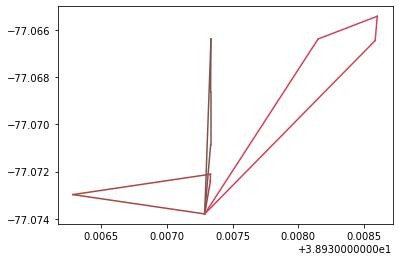

In [23]:
coloured_loc = [np.random.rand(3) for i in range(len(routes))]
for r,co in zip(routes,coloured_loc):
    for a,b in r:
        l1,l2 = location[a], location[b]
        plt.plot([l1[0],l2[0]],[l1[1],l2[1]], color=co)

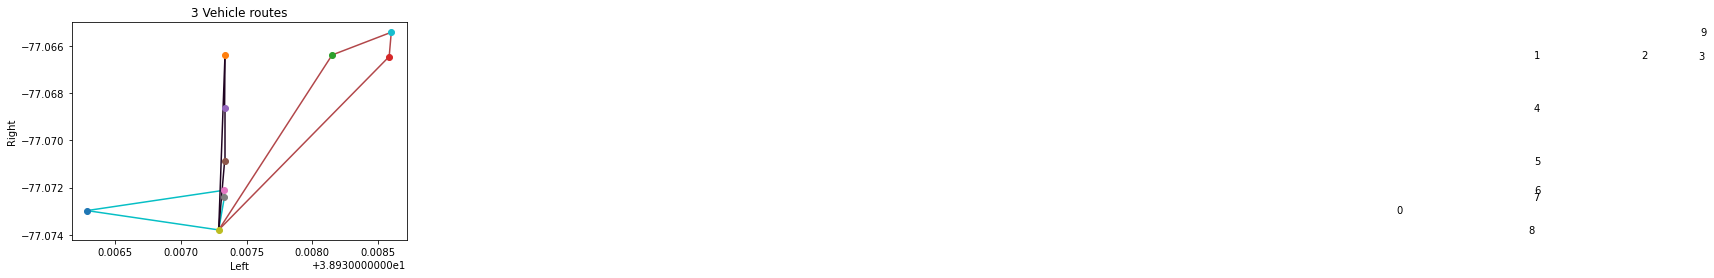

In [24]:
#outline the routes
coloured_loc = [np.random.rand(3) for i in range(len(routes))]
for r,co in zip(routes,coloured_loc):
    for a,b in r:
        l1,l2 = location[a], location[b]
        plt.plot([l1[0],l2[0]],[l1[1],l2[1]], color=co)
for l in location:
    lo = location[l]
    plt.plot(lo[0],lo[1],'o')
    plt.text(lo[0]+.01,lo[1],l,horizontalalignment='center',verticalalignment='center')
    
    
plt.title('%d '%vehicles + 'Vehicle routes' if vehicles > 1 else 'Vehicle route')
plt.xlabel('Left')
plt.ylabel('Right')
plt.show()

In [25]:
df0.head()

,Latitude,Longitude,Coords,ID
0,38.936283,-77.072975,"(38.936283, -77.072975)",0
1,38.937335,-77.066387,"(38.937335, -77.066387)",1
2,38.938151,-77.066389,"(38.938151, -77.066389)",2
3,38.938586,-77.066455,"(38.938586, -77.066455)",3
4,38.937332,-77.068636,"(38.937332, -77.068636)",4


In [26]:
df2 = df0[['Latitude', 'Longitude', 'ID']].copy()
df2.head()

,Latitude,Longitude,ID
0,38.936283,-77.072975,0
1,38.937335,-77.066387,1
2,38.938151,-77.066389,2
3,38.938586,-77.066455,3
4,38.937332,-77.068636,4


In [27]:
routes

[[(8, 0), (0, 6), (6, 7), (7, 8)],
 [(8, 1), (1, 4), (4, 5), (5, 8)],
 [(8, 3), (3, 9), (9, 2), (2, 8)]]

In [28]:
order1 = [0,6,7,8]
order2 = [1,4,5,8]
order3 = [3,9,2,8]

In [29]:
df3 = pd.DataFrame()
for i in order1:
    df3 = df3.append(df2.loc[i])

In [30]:
df4 = pd.DataFrame()
for i in order2:
    df4 = df4.append(df2.loc[i])

In [31]:
df5 = pd.DataFrame()
for i in order3:
    df5 = df5.append(df2.loc[i])

In [32]:
df3.head()


,Latitude,Longitude,ID
0,38.936283,-77.072975,0.0
6,38.937331,-77.072112,6.0
7,38.937330,-77.072418,7.0
8,38.937287,-77.073793,8.0


In [33]:
df4.head()

,Latitude,Longitude,ID
1,38.937335,-77.066387,1.0
4,38.937332,-77.068636,4.0
5,38.937332,-77.070886,5.0
8,38.937287,-77.073793,8.0


In [34]:
df5.head()

,Latitude,Longitude,ID
3,38.938586,-77.066455,3.0
9,38.938602,-77.065426,9.0
2,38.938151,-77.066389,2.0
8,38.937287,-77.073793,8.0


In [35]:
df3.reset_index(inplace = True)
df4.reset_index(inplace = True)
df5.reset_index(inplace = True)

In [36]:
df3 = df3.append(df3.loc[0])
df4 = df4.append(df4.loc[0])
df5 = df5.append(df5.loc[0])

In [37]:
df3

,index,Latitude,Longitude,ID
0,0.0,38.936283,-77.072975,0.0
1,6.0,38.937331,-77.072112,6.0
2,7.0,38.937330,-77.072418,7.0
3,8.0,38.937287,-77.073793,8.0
0,0.0,38.936283,-77.072975,0.0


In [38]:
df4

,index,Latitude,Longitude,ID
0,1.0,38.937335,-77.066387,1.0
1,4.0,38.937332,-77.068636,4.0
2,5.0,38.937332,-77.070886,5.0
3,8.0,38.937287,-77.073793,8.0
0,1.0,38.937335,-77.066387,1.0


In [39]:
df5

,index,Latitude,Longitude,ID
0,3.0,38.938586,-77.066455,3.0
1,9.0,38.938602,-77.065426,9.0
2,2.0,38.938151,-77.066389,2.0
3,8.0,38.937287,-77.073793,8.0
0,3.0,38.938586,-77.066455,3.0


In [40]:
df3.reset_index(inplace = True)
long2 = [] 
lat2 = []  
for i in df3.index:
    long2.append(df3.loc[i]["Longitude"])
    lat2.append(df3.loc[i]["Latitude"])

In [41]:
df4.reset_index(inplace = True)
long3 = [] 
lat3 = []  
for i in df4.index:
    long3.append(df4.loc[i]["Longitude"])
    lat3.append(df4.loc[i]["Latitude"])

In [42]:
df5.reset_index(inplace = True)
long4 = [] 
lat4 = []  
for i in df5.index:
    long4.append(df5.loc[i]["Longitude"])
    lat4.append(df5.loc[i]["Latitude"])

In [43]:
def plot_path(lat, long, origin_point, destination_point):
    fig = go.Figure(go.Scattermapbox(
        name = "Path",
        mode = "lines",
        lon = long,
        lat = lat,
        marker = {'size': 10},
        line = dict(width = 4.5, color = 'grey')))
    fig.add_trace(go.Scattermapbox(
        name = "Source",
        mode = "markers",
        lon = [origin_point[1]],
        lat = [origin_point[0]],
        marker = {'size': 12, 'color':"red"}))
    fig.add_trace(go.Scattermapbox(
        name = "Destination",
        mode = "markers",
        lon = [destination_point[1]],
        lat = [destination_point[0]],
        marker = {'size': 12, 'color':'green'}))
    lat_center = np.mean(lat)
    long_center = np.mean(long)
    fig.update_layout(mapbox_style="carto-darkmatter",
        mapbox_center_lat = 30, mapbox_center_lon=-80)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                      mapbox = {
                          'center': {'lat': lat_center, 
                          'lon': long_center},
                          'zoom': 13})
    fig.show()

In [49]:
origin_point2 = (df3.loc[0]["Latitude"], df3.loc[0]["Longitude"]) 
destination_point2 = (df3.loc[0]["Latitude"], df3.loc[0]["Longitude"])

origin_point3 = (df4.loc[0]["Latitude"], df4.loc[0]["Longitude"]) 
destination_point3 = (df4.loc[0]["Latitude"], df4.loc[0]["Longitude"])

origin_point4 = (df5.loc[0]["Latitude"], df5.loc[0]["Longitude"]) 
destination_point4 = (df5.loc[0]["Latitude"], df5.loc[0]["Longitude"])

In [50]:
import osmnx as ox
import plotly.graph_objects as go

In [51]:
plot_path(lat2, long2, origin_point2, destination_point2)

In [52]:
plot_path(lat3, long3, origin_point3, destination_point3)

In [53]:
plot_path(lat4, long4, origin_point4, destination_point4)

In [78]:
newDist = distances*100000
newDist

,0,1,2,3,4,5,6,7,8,9
0,0.000000,667.146521,684.578849,691.478192,446.400291,233.758893,135.759825,118.594182,129.504440,789.716164
1,667.146521,0.000000,81.600245,125.284676,224.900200,449.900100,572.500140,603.100207,740.615555,159.022325
2,684.578849,81.600245,0.000000,43.997841,239.160406,457.097036,578.144696,608.464313,745.424121,106.337670
3,691.478192,125.284676,43.997841,0.000000,251.580544,460.502736,579.453829,609.384156,745.208998,102.912439
4,446.400291,224.900200,239.160406,251.580544,0.000000,225.000000,347.600014,378.200053,515.719633,345.210081
5,233.758893,449.900100,457.097036,460.502736,225.000000,0.000000,122.600041,153.200131,290.734828,560.575597
6,135.759825,572.500140,578.144696,579.453829,347.600014,122.600041,0.000000,30.600163,168.157575,680.573560
7,118.594182,603.100207,608.464313,609.384156,378.200053,153.200131,30.600163,0.000000,137.567220,710.676072
8,129.504440,740.615555,745.424121,745.208998,515.719633,290.734828,168.157575,137.567220,0.000000,846.970566
9,789.716164,159.022325,106.337670,102.912439,345.210081,560.575597,680.573560,710.676072,846.970566,0.000000


In [79]:
routes

[[(8, 0), (0, 6), (6, 7), (7, 8)],
 [(8, 1), (1, 4), (4, 5), (5, 8)],
 [(8, 3), (3, 9), (9, 2), (2, 8)]]

In [80]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

In [81]:
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = newDist
       
    data['num_vehicles'] = 3
    data['depot'] = 8
    return data

In [82]:
def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    max_route_distance = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += ' {} -> '.format(manager.IndexToNode(index))
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += '{}\n'.format(manager.IndexToNode(index))
       #plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        print(plan_output)
        max_route_distance = max(route_distance, max_route_distance)
    #print('Maximum of the route distances: {}m'.format(max_route_distance))

In [83]:
def main():
    """Solve the CVRP problem."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Distance constraint.
    dimension_name = 'Distance'
    routing.AddDimension(
        transit_callback_index,
        0,  # no slack
        3000,  # vehicle maximum travel distance
        True,  # start cumul to zero
        dimension_name)
    distance_dimension = routing.GetDimensionOrDie(dimension_name)
    distance_dimension.SetGlobalSpanCostCoefficient(100)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)
if __name__ == '__main__':
    main()

Route for vehicle 0:
 8 -> 8

Route for vehicle 1:
 8 -> 8

Route for vehicle 2:
 8 ->  9 ->  7 ->  6 ->  5 ->  4 ->  3 ->  2 ->  1 ->  0 -> 8

